In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
100*df.isnull().sum()/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1, inplace = True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df['Embarked'].fillna('S', inplace = True)

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

- Replace charchters with numbers
- Here we are not going to create dummies insted we are going to replace the catrgories with numbers.
- We will not perfrom scaling

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df['Sex'].replace(['female', 'male'], [0,1], inplace = True)

In [11]:
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [13]:
X = df.drop("Survived", axis = 1)
y = df.Survived

In [14]:
from fancyimpute import IterativeImputer
# !pip install fancyimpute

In [16]:
fancy = IterativeImputer()
X_fancy = pd.DataFrame(fancy.fit_transform(X))
X_fancy.columns = X.columns
X_fancy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.000000,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.000000,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.000000,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.000000,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.000000,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2.0,1.0,27.000000,0.0,0.0,13.0000,0.0
887,1.0,0.0,19.000000,0.0,0.0,30.0000,0.0
888,3.0,0.0,19.709973,1.0,2.0,23.4500,0.0
889,1.0,1.0,26.000000,0.0,0.0,30.0000,1.0


In [17]:
X_fancy.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Original Data')

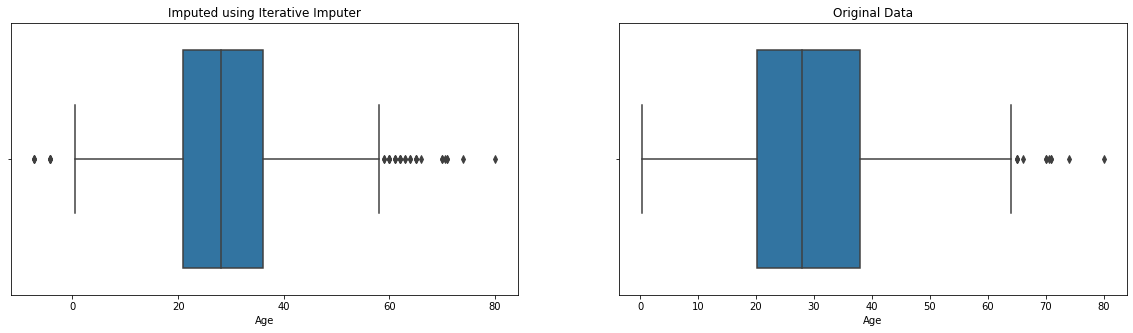

In [19]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(X_fancy['Age'])
plt.title('Imputed using Iterative Imputer')

plt.subplot(1,2,2)
sns.boxplot(X['Age'])
plt.title('Original Data')

In [20]:
from fancyimpute import KNN

In [21]:
X_knn = pd.DataFrame(KNN(k = 5).fit_transform(X))
X_knn.columns = X.columns
X_knn.head()

Imputing row 1/891 with 0 missing, elapsed time: 0.139
Imputing row 101/891 with 0 missing, elapsed time: 0.140
Imputing row 201/891 with 0 missing, elapsed time: 0.141
Imputing row 301/891 with 1 missing, elapsed time: 0.143
Imputing row 401/891 with 0 missing, elapsed time: 0.144
Imputing row 501/891 with 0 missing, elapsed time: 0.145
Imputing row 601/891 with 0 missing, elapsed time: 0.146
Imputing row 701/891 with 0 missing, elapsed time: 0.147
Imputing row 801/891 with 0 missing, elapsed time: 0.148


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0


In [22]:
X_knn.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Original Data')

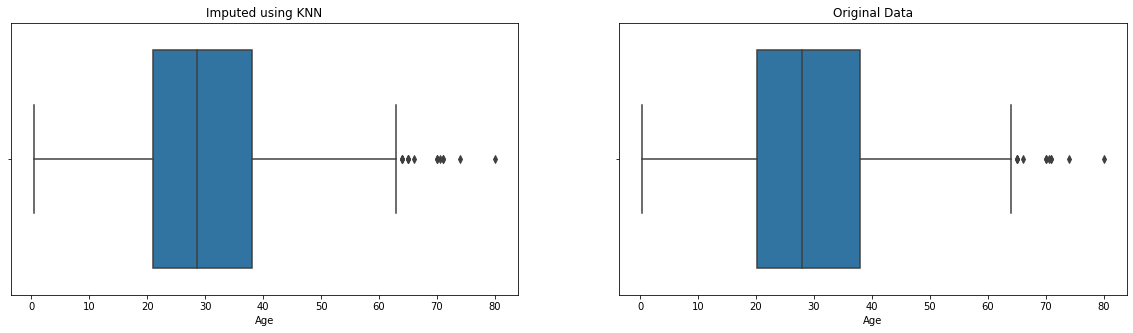

In [23]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(X_knn['Age'])
plt.title('Imputed using KNN')

plt.subplot(1,2,2)
sns.boxplot(X['Age'])
plt.title('Original Data')

In [24]:
100*y.value_counts(normalize=True)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [26]:
# Before you apply any of these techniques your data should not be having any nulls
# X_knn

over = RandomOverSampler(random_state=0)
X_over, y_over = over.fit_sample(X_knn, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
pd.Series(y_over).value_counts()

1    549
0    549
dtype: int64

In [30]:
under = RandomUnderSampler(random_state=0)
X_under, y_under = under.fit_sample(X_knn, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
pd.Series(y_under).value_counts()

1    342
0    342
dtype: int64

In [32]:
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_sample(X_knn, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
pd.Series(y_smote).value_counts()

1    549
0    549
dtype: int64

In [35]:
# Weight of Class

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_knn, y)

y_pred = logreg.predict(X_knn)

print("Accuracy ",metrics.accuracy_score(y, y_pred))
print("Recall ", metrics.recall_score(y, y_pred))

Accuracy  0.8092031425364759
Recall  0.7046783625730995


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight={0: 0.38, 1: 0.62})# class_weight = 'balanced'
logreg.fit(X_knn, y)

y_pred = logreg.predict(X_knn)

print("Accuracy ",metrics.accuracy_score(y, y_pred))
print("Recall ", metrics.recall_score(y, y_pred))

Accuracy  0.7934904601571269
Recall  0.7690058479532164


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
